<a href="https://colab.research.google.com/github/satyasai266/Group61AC/blob/main/Austism_detection_in_early_age_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import TensorFlow and other libraries

In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [61]:
data_dir=data_dir = pathlib.Path("/content/drive/My Drive/Images/")

## Create a dataset

In [66]:
batch_size = 32
iheight = 480
iwidth = 640

In [68]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.6,
  subset="training",
  seed=123,
  image_size = (iheight, iwidth),
  batch_size = batch_size) 

Found 2906 files belonging to 2 classes.
Using 1163 files for training.


In [70]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(iheight, iwidth),
  batch_size=batch_size)

Found 2906 files belonging to 2 classes.
Using 581 files for validation.


In [71]:
class_names = train_ds.class_names
print(class_names)

['Autistic', 'Non_Autistic']


## Data Visualization



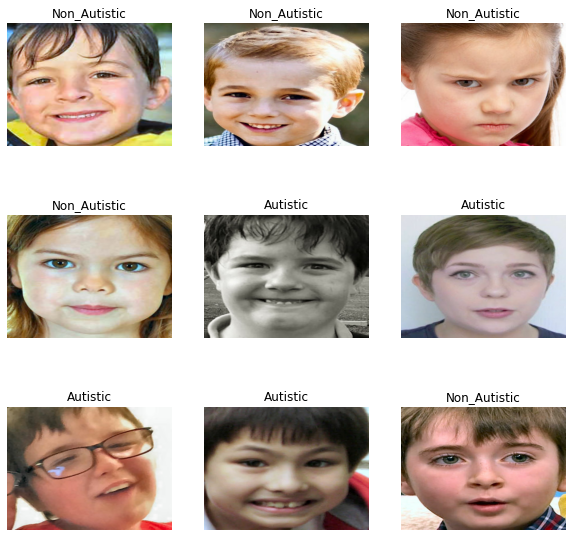

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Train a model using these datasets by passing them to `Model.fit`. 

In [73]:
for ibatch, lbatch in train_ds:
  print(ibatch.shape)
  print(lbatch.shape)
  break

(32, 480, 640, 3)
(32,)


In [74]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [75]:
nlayer = layers.Rescaling(1./255)

In [76]:
normalized_ds = train_ds.map(lambda x, y: (nlayer(x), y))
ibatch, lbatch = next(iter(normalized_ds))
fimage = ibatch[0]
print(np.min(fimage), np.max(fimage)) 

0.0 0.99848944


In [77]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(iheight, iwidth, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [78]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 480, 640, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 480, 640, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 240, 320, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 320, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 120, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 160, 64)      1

## Train the model

In [81]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
37/37 [==============================] - 121s 3s/step - loss: 1.1369 - accuracy: 0.5563 - val_loss: 0.6705 - val_accuracy: 0.6076
Epoch 2/10
37/37 [==============================] - 15s 405ms/step - loss: 0.6518 - accuracy: 0.6002 - val_loss: 0.6040 - val_accuracy: 0.7160
Epoch 3/10
37/37 [==============================] - 15s 404ms/step - loss: 0.5976 - accuracy: 0.6810 - val_loss: 0.5820 - val_accuracy: 0.7005
Epoch 4/10
37/37 [==============================] - 15s 404ms/step - loss: 0.5183 - accuracy: 0.7438 - val_loss: 0.5594 - val_accuracy: 0.6936
Epoch 5/10
37/37 [==============================] - 15s 403ms/step - loss: 0.4309 - accuracy: 0.8065 - val_loss: 0.6109 - val_accuracy: 0.7074
Epoch 6/10
37/37 [==============================] - 15s 403ms/step - loss: 0.3327 - accuracy: 0.8581 - val_loss: 0.7571 - val_accuracy: 0.6472
Epoch 7/10
37/37 [==============================] - 15s 403ms/step - loss: 0.2570 - accuracy: 0.8899 - val_loss: 0.7312 - val_accuracy: 0.7349
E

## Visualize training results

Create plots of loss and accuracy on the training and validation sets:

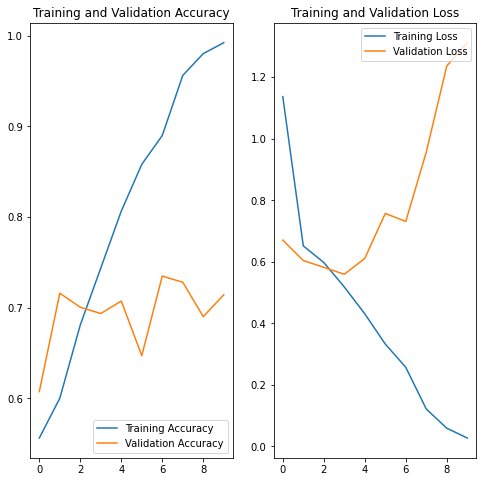

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("vertical", input_shape=(iheight,iwidth,3)), layers.RandomRotation(0.1), layers.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

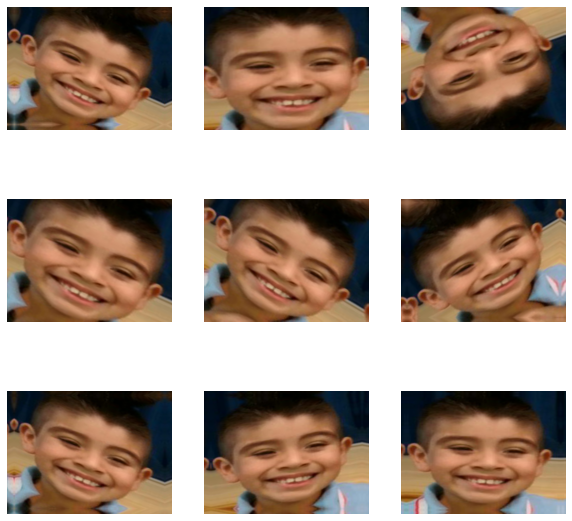

In [84]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [85]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile and train the model

In [86]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 480, 640, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 480, 640, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 480, 640, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 240, 320, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 240, 320, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 120, 160, 32)     0         
 2D)                                                  

In [88]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
37/37 [==============================] - 18s 453ms/step - loss: 1.7224 - accuracy: 0.5340 - val_loss: 0.7090 - val_accuracy: 0.4974
Epoch 2/15
37/37 [==============================] - 16s 446ms/step - loss: 0.6825 - accuracy: 0.5598 - val_loss: 0.6738 - val_accuracy: 0.6213
Epoch 3/15
37/37 [==============================] - 16s 445ms/step - loss: 0.6767 - accuracy: 0.5813 - val_loss: 0.6599 - val_accuracy: 0.5697
Epoch 4/15
37/37 [==============================] - 17s 447ms/step - loss: 0.6680 - accuracy: 0.5950 - val_loss: 0.6529 - val_accuracy: 0.6007
Epoch 5/15
37/37 [==============================] - 16s 447ms/step - loss: 0.6493 - accuracy: 0.6414 - val_loss: 0.6373 - val_accuracy: 0.6231
Epoch 6/15
37/37 [==============================] - 16s 445ms/step - loss: 0.6522 - accuracy: 0.6320 - val_loss: 0.6291 - val_accuracy: 0.6248
Epoch 7/15
37/37 [==============================] - 16s 446ms/step - loss: 0.6365 - accuracy: 0.6475 - val_loss: 0.6166 - val_accuracy: 0.6902

## Visualize training results

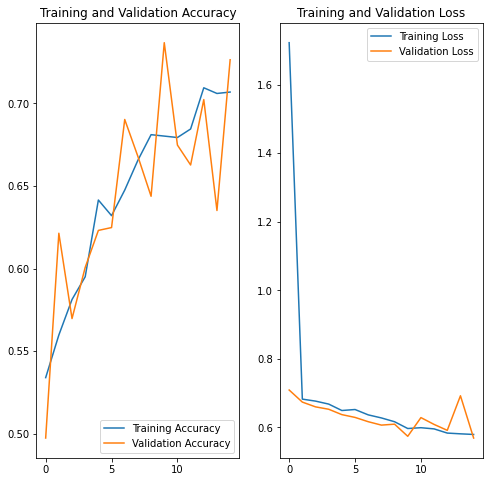

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

Testing on new dataset

In [114]:
img = tf.keras.utils.load_img("/content/drive/MyDrive/Images/Autistic/Autism.jpg", target_size=(iheight, iwidth))
iarray = tf.keras.utils.img_to_array(img)
iarray = tf.expand_dims(iarray, 0)
predictions = model.predict(iarray)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to Autistic with a 72.90 percent confidence.
